In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [38]:
data_train = pd.read_csv('data/emnist-balanced-train.csv')
data_test = pd.read_csv('data/emnist-balanced-test.csv')
mapp = pd.read_csv("data/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None).squeeze("columns")
data_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# X_train = X_train.to_numpy()

# for i in range(100, 109):
#     plt.subplot(330 + (i+1))
#     plt.imshow(X_train[i].reshape(28,28), cmap='gray_r')
#     plt.title(chr(mapp[y_train[i]]))

In [40]:
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]

X_train = X_train.to_numpy()
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

X_train_scaled = X_train / 255.0
X_train_scaled = X_train_scaled.astype('float32')
X_train_scaled,val_scaled,y_train,val_target = train_test_split(X_train_scaled,y_train,train_size=0.2, random_state=42)

(112799, 784) (112799,) (18799, 784) (18799,)


In [41]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(712,activation='relu',name='hidden1'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512,activation='relu',name='hidden2'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256,activation='relu',name='hidden3'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(48,activation='softmax',name='output'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 712)               558920    
                                                                 
 dropout_11 (Dropout)        (None, 712)               0         
                                                                 
 hidden2 (Dense)             (None, 512)               365056    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 hidden3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)              

In [42]:
from keras.optimizers import gradient_descent_v2 

learning_rate = 0.001
momentum = 0.9
sgd = gradient_descent_v2.SGD(learning_rate=learning_rate, momentum=momentum,  nesterov=True)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [43]:
X_train_scaled = X_train_scaled.reshape(-1,28,28)
y_train = y_train.to_numpy()
val_scaled = val_scaled.reshape(-1,28,28)
val_target = val_target.to_numpy()
history = model.fit(X_train_scaled,y_train,batch_size=10,epochs=15,verbose=1,validation_data=(val_scaled,val_target))

Epoch 1/35
2256/2256 [==============================] - 17s 7ms/step - loss: 2.6446 - accuracy: 0.2954 - val_loss: 1.4848 - val_accuracy: 0.5824
Epoch 2/35
2256/2256 [==============================] - 17s 7ms/step - loss: 1.5572 - accuracy: 0.5489 - val_loss: 1.1282 - val_accuracy: 0.6722
Epoch 3/35
2256/2256 [==============================] - 17s 8ms/step - loss: 1.2491 - accuracy: 0.6276 - val_loss: 0.9511 - val_accuracy: 0.7129
Epoch 4/35
2256/2256 [==============================] - 17s 8ms/step - loss: 1.0913 - accuracy: 0.6650 - val_loss: 0.8674 - val_accuracy: 0.7318
Epoch 5/35
2256/2256 [==============================] - 17s 8ms/step - loss: 0.9767 - accuracy: 0.6980 - val_loss: 0.7965 - val_accuracy: 0.7503
Epoch 6/35
2256/2256 [==============================] - 18s 8ms/step - loss: 0.8926 - accuracy: 0.7163 - val_loss: 0.7466 - val_accuracy: 0.7640
Epoch 7/35
2256/2256 [==============================] - 17s 8ms/step - loss: 0.8329 - accuracy: 0.7358 - val_loss: 0.7100 - val_ac

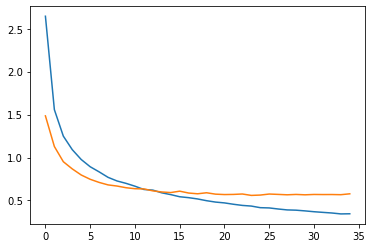

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


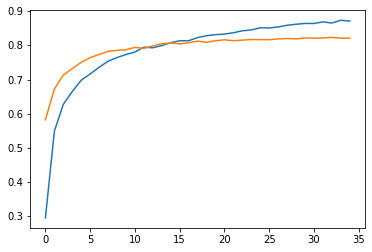

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])